<a href="https://colab.research.google.com/github/Kaiziferr/-Miner_Detector/blob/master/RNN/05_workshop_LSTM_stack_memory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stacked LSTM con memoria entre batchs
Las redes LSTM se pueden apilar de la misma manera que se pueden apilar otros tipos de capas. Una adición a la configuración que se requiere es que una capa LSTM antes de cada capa LSTM subsiguiente debe devolver la secuencia

Esto se puede hacer configurando el parámetro **return_sequences** en la capa True

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
def create_dataset(data, loock_back = 1):
  dataX, dataY = [], []
  for i in range(len(data) - loock_back-1):
    a = data[i: (i+loock_back), 0]
    dataX.append(a)
    dataY.append(data[i+loock_back, 0])
  return np.array(dataX), np.array(dataY)


In [3]:
data = pd.read_csv('./data/international-airline-passengers.csv', usecols=[1], engine='python')
data_values = data.values.astype('float32')

In [4]:
#Normalization de datos
scaler = MinMaxScaler(feature_range=(0,1))
data_values = scaler.fit_transform(data_values)

In [5]:
#train and test
train_size = int(len(data_values)*0.67)
test_set = len(data_values) - train_size
train, test = data_values[0:train_size, :], data_values[train_size:, :]
display(len(data_values), len(train), len(test) )

144

96

48

In [6]:
loock_back = 3
trainX, trainY = create_dataset(train, loock_back)
testX, testY = create_dataset(test, loock_back)

In [7]:
# cambia la ventana y la caracteristica
trainX = np.reshape(trainX, (trainX.shape[0],trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1],1))

92/92 - 18s - loss: 0.0192
92/92 - 0s - loss: 0.0161
92/92 - 0s - loss: 0.0164
92/92 - 0s - loss: 0.0161
92/92 - 0s - loss: 0.0150
92/92 - 0s - loss: 0.0140
92/92 - 0s - loss: 0.0133
92/92 - 0s - loss: 0.0122
92/92 - 0s - loss: 0.0133
92/92 - 0s - loss: 0.0106
92/92 - 0s - loss: 0.0094
92/92 - 0s - loss: 0.0092
92/92 - 0s - loss: 0.0088
92/92 - 0s - loss: 0.0064
92/92 - 0s - loss: 0.0063
92/92 - 0s - loss: 0.0056
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0053
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0027
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0027
92/92 - 0s - loss: 0.0028
92/92 - 0s 

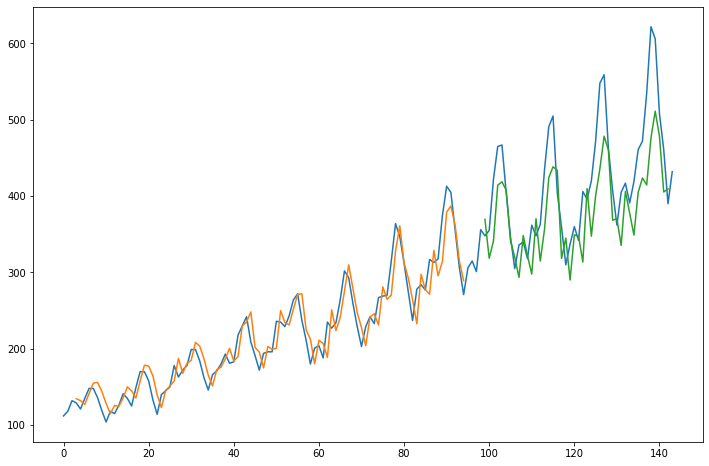

In [8]:
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape = (batch_size, loock_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape = (batch_size, loock_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
  model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=True)
  model.reset_states


trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
model.reset_states()

#Invert prediction
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calcular el error
train_score = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Puntuación Entrenamiento: %.2f RMSE' % (train_score))

test_score = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Puntuación Test: %.2f RMSE' % (test_score))

trainPredictPlot = np.empty_like(data_values)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[loock_back: len(trainPredict)+loock_back, :] = trainPredict

testPredictPlot = np.empty_like(data_values)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(trainPredict)+(loock_back*2)+1:len(data_values)-1,:] = testPredict

plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(data_values))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)